In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
dataset = pd.read_csv('CSV\Data Prototype 1a.csv')
dataset.head()

,Tanggal,Tn,Tx,Tavg,ddd_x,ff_avg,N,NE,E,SE,S,SW,W,NW,C,Jan,Feb,Mar,Apr,Mei,Jun,Jul,Ags,Sep,Okt,Nov,Des,RH_avg_5day,RH1,RH2,RH3,RH_avg,ff_x,ff_x1,ff_x2,ff_x3,RR_avg5_day,RR1,RR2,RR3,RR
0,06-02-2010,24.7,29.4,26.5,240.0,2.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,80.4,81.0,80.0,80.0,85.0,7.0,7.0,9.0,9.0,3.560000,2.5,0.80000,1.70000,0.20000
1,07-02-2010,25.0,32.2,27.5,120.0,2.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,81.0,80.0,80.0,85.0,83.0,7.0,9.0,9.0,7.0,3.480000,0.8,1.70000,0.20000,16.10000
2,08-02-2010,25.2,32.5,27.4,100.0,2.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,81.8,80.0,85.0,83.0,81.0,10.0,9.0,7.0,7.0,4.260000,1.7,0.20000,16.10000,8.33913
3,09-02-2010,25.0,32.0,27.2,100.0,2.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,81.8,85.0,83.0,81.0,82.0,6.0,7.0,7.0,10.0,5.427826,0.2,16.10000,8.33913,0.00000
4,10-02-2010,24.2,32.2,28.1,200.0,2.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,82.2,83.0,81.0,82.0,82.0,7.0,7.0,10.0,6.0,5.267826,16.1,8.33913,0.00000,7.70000


In [3]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Tn,2987.0,24.505217,0.986270,18.0,24.000000,24.600000,25.188385,27.900000
Tx,2981.0,30.964174,1.608543,3.6,30.000000,31.200000,32.100000,36.000000
Tavg,2989.0,27.265009,1.128515,23.2,26.600000,27.400000,28.000000,30.700000
ddd_x,2988.0,165.489971,66.810621,0.0,120.000000,140.000000,220.000000,360.000000
ff_avg,2989.0,2.180653,1.092883,0.0,1.000000,2.000000,3.000000,7.000000
N,2989.0,0.275008,0.446593,0.0,0.000000,0.000000,1.000000,1.000000
NE,2989.0,0.003011,0.054799,0.0,0.000000,0.000000,0.000000,1.000000
E,2989.0,0.208096,0.406014,0.0,0.000000,0.000000,0.000000,1.000000
SE,2989.0,0.260622,0.439048,0.0,0.000000,0.000000,1.000000,1.000000
S,2989.0,0.028103,0.165295,0.0,0.000000,0.000000,0.000000,1.000000


In [4]:
dataset.shape

(2989, 41)

In [5]:
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [6]:
dataset.corr().style.applymap(color_negative_red)

,Tn,Tx,Tavg,ddd_x,ff_avg,N,NE,E,SE,S,SW,W,NW,C,Jan,Feb,Mar,Apr,Mei,Jun,Jul,Ags,Sep,Okt,Nov,Des,RH_avg_5day,RH1,RH2,RH3,RH_avg,ff_x,ff_x1,ff_x2,ff_x3,RR_avg5_day,RR1,RR2,RR3,RR
Tn,1,0.443456,0.661905,0.154509,-0.242621,0.179953,-0.00710456,-0.276263,-0.0653477,0.059065,0.0366198,0.0584288,0.0430485,0.0918143,0.0854992,0.0229888,0.0990819,0.16405,0.165084,-0.054301,-0.230976,-0.30192,-0.183139,0.0261567,0.0554457,0.0966149,0.0129062,0.0177278,0.0278872,-0.036786,-0.0175035,-0.196815,-0.250749,-0.225449,-0.224623,0.145503,0.088078,0.0966227,0.0297492,-0.0388765
Tx,0.443456,1,0.715719,0.365357,-0.4006,0.235799,-0.0177834,-0.411946,-0.176775,0.0748827,0.0965595,0.221132,0.106817,0.102994,0.206792,0.200541,0.255704,0.210219,0.0373024,-0.0743022,-0.268533,-0.305023,-0.25851,-0.146267,-0.0201896,0.0791647,-0.102348,-0.0567726,-0.0931363,-0.118143,-0.221314,-0.172169,-0.200803,-0.18234,-0.18732,0.191972,0.113215,0.0834721,0.100405,0.0519979
Tavg,0.661905,0.715719,1,0.214406,-0.316205,0.230072,0.00441014,-0.370109,-0.0711058,0.067671,0.0554237,0.101499,0.0427154,0.0854443,0.131469,0.0911032,0.184613,0.2274,0.154753,-0.0809962,-0.281801,-0.327046,-0.239281,-0.0540592,0.0486445,0.0686497,-0.117866,-0.0710004,-0.0890887,-0.145108,-0.389525,-0.233278,-0.280954,-0.270412,-0.256587,0.193055,0.109468,0.103602,0.0964614,-0.00705979
ddd_x,0.154509,0.365357,0.214406,1,-0.307438,0.163579,-0.0264596,-0.356762,-0.276926,0.0348217,0.152173,0.384821,0.137223,0.0640239,0.29736,0.191799,0.187485,0.0767458,-0.146253,-0.131191,-0.191581,-0.168621,-0.136275,-0.140088,-0.0785316,0.18712,-0.0959331,-0.0743541,-0.0659829,-0.0678037,-0.0442258,-0.00853959,-0.0225511,-0.0423971,-0.0370004,0.116274,0.0626356,0.0581581,0.070849,0.0718255
ff_avg,-0.242621,-0.4006,-0.316205,-0.307438,1,-0.446917,0.013267,0.420208,0.27709,-0.0911023,-0.0578418,-0.0606728,-0.039337,-0.214736,-0.12079,-0.159868,-0.180912,-0.169624,-0.0140026,0.0783996,0.250628,0.32989,0.202532,0.105347,-0.109691,-0.142902,-0.0754898,-0.0665584,-0.0504673,-0.0735353,-0.161846,0.487974,0.286754,0.301725,0.346075,-0.296836,-0.16826,-0.172793,-0.17746,-0.172443
N,0.179953,0.235799,0.230072,0.163579,-0.446917,1,-0.033847,-0.31572,-0.365661,-0.10473,-0.110369,-0.23292,-0.10537,-0.124862,0.0600673,0.0719129,0.112424,0.0951528,-0.0461333,-0.0365408,-0.122261,-0.137168,-0.119468,-0.0835679,0.0827103,0.0854652,0.0717585,0.0541796,0.0660929,0.0586695,0.108994,-0.401536,-0.332235,-0.345577,-0.350731,0.207388,0.113599,0.128909,0.115598,0.102666
NE,-0.00710456,-0.0177834,0.00441014,-0.0264596,0.013267,-0.033847,1,-0.0281714,-0.0326276,-0.00934501,-0.00984817,-0.0207832,-0.00940209,-0.0111413,-0.0164941,-0.0165668,-0.0186942,-0.0182879,0.0506812,0.00647211,0.00568352,0.0318277,0.0326759,-0.0164576,-0.016238,-0.0164576,0.00892608,-0.00451353,0.0359077,0.00746014,-0.0140415,0.0298601,0.0421026,0.0421207,0.0322921,0.033858,-0.0103037,0.056385,0.0078635,0.0182936
E,-0.276263,-0.411946,-0.370109,-0.356762,0.420208,-0.31572,-0.0281714,1,-0.304347,-0.0871691,-0.0918625,-0.193863,-0.0877015,-0.103925,-0.150861,-0.145586,-0.160862,-0.101816,0.0947891,0.145439,0.220307,0.222969,0.129951,0.0444075,-0.11204,-0.135522,-0.0206428,-0.00791021,-0.00258278,-0.0195432,-0.010778,0.201564,0.178087,0.194379,0.202627,-0.24477,-0.148839,-0.135,-0.140362,-0.132789
SE,-0.0653477,-0.176775,-0.0711058,-0.276926,0.27709,-0.365661,-0.0326276,-0.304347,1,-0.100958,-0.106393,-0.224529,-0.101574,-0.120364,-0.158815,-0.143124,-0.139467,-0.0525703,0.0520623,0.00629735,0.0709357,0.0874374,0.134993,0.196583,0.110643,-0.127881,0.0532413,0.0337315,0.0231252,0.0199076,-0.0169332,0.129155,0.110043,0.0971889,0.101355,-0.057196,-0.0337278,-0.0280977,-0.0115105,-0.025761
S,0.059065,0.0748827,0.067671,0.0348217,-0.0911023,-0.10473,-0.00934501,-0.0871691,-0.100958,1,-0.0304725,-0.0643082,-0.0290923,-0.0344739,-0.00692196,0.00734267,0.00855226,0.0380096,-0.0283628,-0.0124404,-0.0363317,-0.0396407,-0.0150622,-0.0214598,0.0465979,0.0522004,-0.026694,-0.00314219,-

In [7]:
dataset.fillna(method='ffill',inplace=True)

In [8]:
dataset = dataset.drop(columns = ['ff_avg','Tanggal'])

In [9]:
dataset[dataset.Tx<=20]

,Tn,Tx,Tavg,ddd_x,N,NE,E,SE,S,SW,W,NW,C,Jan,Feb,Mar,Apr,Mei,Jun,Jul,Ags,Sep,Okt,Nov,Des,RH_avg_5day,RH1,RH2,RH3,RH_avg,ff_x,ff_x1,ff_x2,ff_x3,RR_avg5_day,RR1,RR2,RR3,RR
2427,25.3,3.6,27.6,130.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,80.8,75.0,84.0,83.0,79.0,7.0,8.0,4.0,5.0,3.916471,8.541176,0.4,0.0,19.4


In [10]:
dataset = dataset.drop(dataset.index[2427])

In [11]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset)

In [12]:
dataset_scaled

array([[0.67676768, 0.44067797, 0.44      , ..., 0.00401003, 0.0085213 ,
        0.00100251],
       [0.70707071, 0.6779661 , 0.57333333, ..., 0.0085213 , 0.00100251,
        0.08070175],
       [0.72727273, 0.70338983, 0.56      , ..., 0.00100251, 0.08070175,
        0.04180015],
       ...,
       [0.70707071, 0.52542373, 0.6       , ..., 0.00250627, 0.05635517,
        0.00200501],
       [0.72783389, 0.59500446, 0.62814815, ..., 0.05635517, 0.00200501,
        0.05635517],
       [0.72783389, 0.62711864, 0.58666667, ..., 0.00200501, 0.05635517,
        0.05635517]])

In [13]:
dataset.columns

Index(['Tn', 'Tx', 'Tavg', 'ddd_x', 'N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW',
       'C', 'Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep',
       'Okt', 'Nov', 'Des', 'RH_avg_5day', 'RH1', 'RH2', 'RH3', 'RH_avg',
       'ff_x', 'ff_x1', 'ff_x2', 'ff_x3', 'RR_avg5_day', 'RR1', 'RR2', 'RR3',
       'RR'],
      dtype='object')

In [14]:
dataset_scaled[:,38]

array([0.00100251, 0.08070175, 0.04180015, ..., 0.00200501, 0.05635517,
       0.05635517])

In [15]:
#Buat split data
#Buat X yg di drop yang target, y jadi target

X = np.delete(dataset_scaled,38,axis=1)
y = dataset_scaled[:,38]

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

In [17]:
X_train.shape[1]

38

In [18]:
X_test2 = X_test

In [19]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

In [20]:
# Impor Keras dan library yang lain


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [21]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (1,38)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['acc'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             17800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

In [23]:
# Reshaping
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1])) 

In [24]:
X_train.shape

(2689, 1, 38)

In [25]:
def on_train_begin(self, logs=None):
    self.epoch = []
    self.history = {}
 
def on_epoch_end(self, epoch, logs=None):
    logs = logs or {}
    self.epoch.append(epoch)
    for k, v in logs.items():
        self.history.setdefault(k, []).append(v)

PERCOBAAN 1

In [26]:
pelatihan = regressor.fit(X_train, y_train, validation_split = 0.10, epochs = 200, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Train on 2420 samples, validate on 269 samples
Epoch 1/200
2420/2420 [==============================] - 8s 3ms/step - loss: 0.0102 - acc: 0.2351 - val_loss: 0.0157 - val_acc: 0.2230
Epoch 2/200
2420/2420 [==============================] - 2s 645us/step - loss: 0.0096 - acc: 0.2351 - val_loss: 0.0152 - val_acc: 0.2230
Epoch 3/200
2420/2420 [==============================] - 2s 657us/step - loss: 0.0093 - acc: 0.2351 - val_loss: 0.0148 - val_acc: 0.2230
Epoch 4/200
2420/2420 [==============================] - 2s 648us/step - loss: 0.0092 - acc: 0.2351 - val_loss: 0.0147 - val_acc: 0.2230
Epoch 5/200
2420/2420 [==============================] - 2s 634us/step - loss: 0.0091 - acc: 0.2351 - val_loss: 0.0146 - val_acc: 0.2230
Epoch 6/200
2420/2420 [==============================] - 2s 635us/step - loss: 0.0089 - acc: 0.2351 - val_loss: 0.0145 - val_acc: 0.2230
Epoch 7/200
2420/2420 [==============================] - 2s 636us/step - loss: 0.0089

2420/2420 [==============================] - 2s 643us/step - loss: 0.0073 - acc: 0.2351 - val_loss: 0.0137 - val_acc: 0.2230
Epoch 59/200
2420/2420 [==============================] - 2s 631us/step - loss: 0.0070 - acc: 0.2355 - val_loss: 0.0143 - val_acc: 0.2230
Epoch 60/200
2420/2420 [==============================] - 2s 633us/step - loss: 0.0074 - acc: 0.2351 - val_loss: 0.0152 - val_acc: 0.2230
Epoch 61/200
2420/2420 [==============================] - 2s 638us/step - loss: 0.0071 - acc: 0.2351 - val_loss: 0.0140 - val_acc: 0.2230
Epoch 62/200
2420/2420 [==============================] - 2s 637us/step - loss: 0.0071 - acc: 0.2351 - val_loss: 0.0140 - val_acc: 0.2230
Epoch 63/200
2420/2420 [==============================] - 2s 631us/step - loss: 0.0072 - acc: 0.2355 - val_loss: 0.0142 - val_acc: 0.2230
Epoch 64/200
2420/2420 [==============================] - 2s 630us/step - loss: 0.0071 - acc: 0.2351 - val_loss: 0.0142 - val_acc: 0.2230
Epoch 65/200
2420/2420 [=======================

Epoch 176/200
2420/2420 [==============================] - 2s 632us/step - loss: 0.0063 - acc: 0.2355 - val_loss: 0.0143 - val_acc: 0.2230
Epoch 177/200
2420/2420 [==============================] - 2s 638us/step - loss: 0.0063 - acc: 0.2355 - val_loss: 0.0143 - val_acc: 0.2230
Epoch 178/200
2420/2420 [==============================] - 2s 648us/step - loss: 0.0063 - acc: 0.2355 - val_loss: 0.0143 - val_acc: 0.2230
Epoch 179/200
2420/2420 [==============================] - 2s 641us/step - loss: 0.0064 - acc: 0.2355 - val_loss: 0.0142 - val_acc: 0.2230
Epoch 180/200
2420/2420 [==============================] - 2s 640us/step - loss: 0.0063 - acc: 0.2355 - val_loss: 0.0146 - val_acc: 0.2230
Epoch 181/200
2420/2420 [==============================] - 2s 639us/step - loss: 0.0060 - acc: 0.2351 - val_loss: 0.0145 - val_acc: 0.2230
Epoch 182/200
2420/2420 [==============================] - 2s 649us/step - loss: 0.0061 - acc: 0.2355 - val_loss: 0.0150 - val_acc: 0.2230
Epoch 183/200
2420/2420 [==

In [27]:
pelatihan.history

{'val_loss': [0.015661047105106168,
  0.01517308370701858,
  0.014774134816241808,
  0.014708061916338189,
  0.014565131279941109,
  0.01450162109240308,
  0.014383834765940129,
  0.01455720750351876,
  0.014599463655734538,
  0.014627386115622953,
  0.014227395376959145,
  0.014514355823314545,
  0.01500555640908796,
  0.014418280881666839,
  0.015346015370745198,
  0.014973917054652919,
  0.014282490933473226,
  0.014005447340589085,
  0.014074520012329169,
  0.013936270486224152,
  0.013966239134514476,
  0.014002409320476994,
  0.015076207901527723,
  0.014360757632921951,
  0.014231938493981624,
  0.01405462630518944,
  0.014274023598766294,
  0.014772328371562922,
  0.013987465639127812,
  0.013736469790574897,
  0.014494552486056815,
  0.014073137081397843,
  0.01395412733809517,
  0.013999176790702355,
  0.014143082270828045,
  0.013737935346956312,
  0.013858966835771019,
  0.013771619208046273,
  0.014101111058311945,
  0.014155330847893395,
  0.013749719187132598,
  0.014139

In [28]:
def plot_history(pelatihan):
    history_dict = pelatihan.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    epochs = range(1, len(acc_values) + 1)
    
    plt.plot(epochs, loss_values, 'b', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    plt.plot(epochs, acc_values, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Validation')
    plt.legend()
    plt.show()

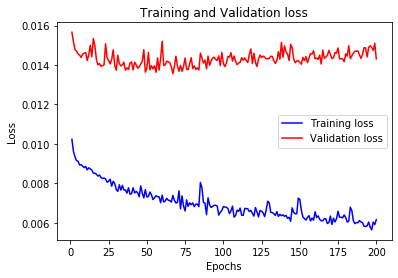

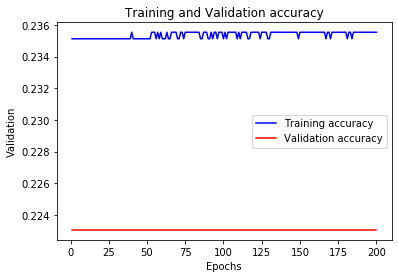

In [29]:
plot_history(pelatihan)

In [38]:
pelatihan.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [36]:
import statistics as stats

In [109]:
loss_mean1 = stats.mean(pelatihan.history['loss'])
loss_mean1

0.006996108895834451

In [110]:
acc_mean1 = stats.mean(pelatihan.history['acc'])
acc_mean1

0.23536983473426548

In [111]:
valloss_mean1 = stats.mean(pelatihan.history['val_loss'])
valloss_mean1

0.014320264091515277

In [112]:
val_acc_mean1 = stats.mean(pelatihan.history['val_acc'])
val_acc_mean1

0.223048327691493

In [30]:
X_test.shape

(299, 38)

In [31]:
X_testReal = X_test

In [32]:
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [40]:
predicted_RR = regressor.predict(X_test)

In [41]:
predicted_RR.shape

(299, 1)

In [42]:
predicted_RReal = np.hstack((X_testReal,predicted_RR))

In [43]:
predicted_RReal.shape

(299, 39)

In [44]:
predicted_RReal_a = sc.inverse_transform(predicted_RReal)

In [45]:
percobaan1 = predicted_RReal_a[:,38]

In [46]:
y_testReal = np.asarray(y_test)

In [47]:
y_testReal.shape[0]

299

In [48]:
y_testReal = np.reshape(y_testReal,(y_testReal.shape[0],1))

In [49]:
real_data = np.hstack((X_testReal,y_testReal))

In [50]:
real_data = sc.inverse_transform(real_data)

In [51]:
real_data.shape

(299, 39)

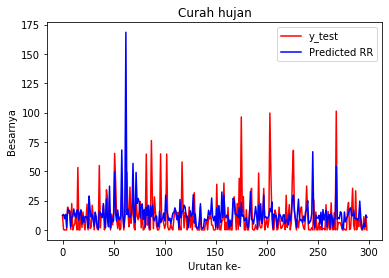

In [52]:
# Visualising the results
plt.plot(real_data[:,38], color = 'red', label = 'y_test')
plt.plot(percobaan1, color = 'blue', label = 'Predicted RR')
plt.title('Curah hujan')
plt.xlabel('Urutan ke-')
plt.ylabel('Besarnya')
plt.legend()
plt.show()

In [53]:
evals = regressor.evaluate(X_test,y_test) #MSE
evals

299/299 [==============================] - 0s 254us/step


[0.007056520906834549, 0.24749163909500657]

In [54]:
evals

[0.007056520906834549, 0.24749163909500657]

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
mse1 = mean_squared_error(real_data[:,38],percobaan1)
mse1

280.8513023207377

PERCOBAAN 2

In [57]:
pelatihan2 = regressor.fit(X_train, y_train, validation_split = 0.10, epochs = 200, batch_size = 32)

Train on 2420 samples, validate on 269 samples
Epoch 1/200
2420/2420 [==============================] - 2s 660us/step - loss: 0.0062 - acc: 0.2355 - val_loss: 0.0145 - val_acc: 0.2230
Epoch 2/200
2420/2420 [==============================] - 2s 643us/step - loss: 0.0057 - acc: 0.2355 - val_loss: 0.0151 - val_acc: 0.2230
Epoch 3/200
2420/2420 [==============================] - 2s 648us/step - loss: 0.0059 - acc: 0.2355 - val_loss: 0.0145 - val_acc: 0.2230
Epoch 4/200
2420/2420 [==============================] - 2s 653us/step - loss: 0.0061 - acc: 0.2355 - val_loss: 0.0147 - val_acc: 0.2230
Epoch 5/200
2420/2420 [==============================] - 2s 645us/step - loss: 0.0059 - acc: 0.2355 - val_loss: 0.0147 - val_acc: 0.2230
Epoch 6/200
2420/2420 [==============================] - 2s 650us/step - loss: 0.0059 - acc: 0.2355 - val_loss: 0.0148 - val_acc: 0.2230
Epoch 7/200
2420/2420 [==============================] - 2s 629us/step - loss: 0.0060 - acc: 0.2355 - val_loss: 0.0145 - val_acc: 0

2420/2420 [==============================] - 2s 642us/step - loss: 0.0053 - acc: 0.2355 - val_loss: 0.0145 - val_acc: 0.2230
Epoch 61/200
2420/2420 [==============================] - 2s 639us/step - loss: 0.0054 - acc: 0.2355 - val_loss: 0.0152 - val_acc: 0.2230
Epoch 62/200
2420/2420 [==============================] - 2s 653us/step - loss: 0.0052 - acc: 0.2355 - val_loss: 0.0153 - val_acc: 0.2230
Epoch 63/200
2420/2420 [==============================] - 2s 635us/step - loss: 0.0056 - acc: 0.2355 - val_loss: 0.0152 - val_acc: 0.2230
Epoch 64/200
2420/2420 [==============================] - 2s 635us/step - loss: 0.0058 - acc: 0.2355 - val_loss: 0.0150 - val_acc: 0.2230
Epoch 65/200
2420/2420 [==============================] - 2s 634us/step - loss: 0.0054 - acc: 0.2355 - val_loss: 0.0160 - val_acc: 0.2230
Epoch 66/200
2420/2420 [==============================] - 2s 636us/step - loss: 0.0053 - acc: 0.2355 - val_loss: 0.0152 - val_acc: 0.2230
Epoch 67/200
2420/2420 [=======================

2420/2420 [==============================] - 2s 648us/step - loss: 0.0044 - acc: 0.2355 - val_loss: 0.0152 - val_acc: 0.2230
Epoch 179/200
2420/2420 [==============================] - 2s 694us/step - loss: 0.0047 - acc: 0.2355 - val_loss: 0.0151 - val_acc: 0.2230
Epoch 180/200
2420/2420 [==============================] - 2s 783us/step - loss: 0.0045 - acc: 0.2355 - val_loss: 0.0157 - val_acc: 0.2230
Epoch 181/200
2420/2420 [==============================] - 2s 641us/step - loss: 0.0046 - acc: 0.2355 - val_loss: 0.0160 - val_acc: 0.2230
Epoch 182/200
2420/2420 [==============================] - 2s 671us/step - loss: 0.0048 - acc: 0.2355 - val_loss: 0.0156 - val_acc: 0.2230
Epoch 183/200
2420/2420 [==============================] - 2s 655us/step - loss: 0.0046 - acc: 0.2355 - val_loss: 0.0153 - val_acc: 0.2230
Epoch 184/200
2420/2420 [==============================] - 2s 663us/step - loss: 0.0045 - acc: 0.2355 - val_loss: 0.0164 - val_acc: 0.2230
Epoch 185/200
2420/2420 [================

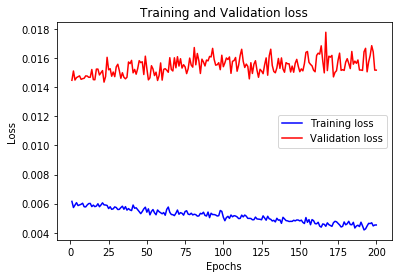

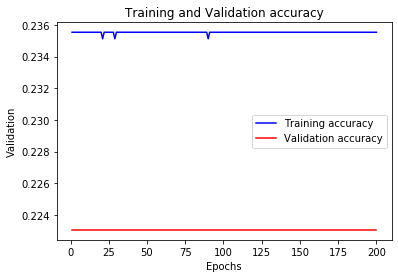

In [58]:
plot_history(pelatihan2)

In [59]:
loss_mean2 = stats.mean(pelatihan2.history['loss'])
loss_mean2

0.005165162592636102

In [60]:
acc_mean2 = stats.mean(pelatihan2.history['acc'])
acc_mean2

0.23553099176102926

In [61]:
valloss_mean2 = stats.mean(pelatihan2.history['val_loss'])
valloss_mean2

0.0154402002668312

In [62]:
val_acc_mean2 = stats.mean(pelatihan2.history['val_acc'])
val_acc_mean2

0.223048327691493

In [63]:
predicted_RR2 = regressor.predict(X_test)

In [64]:
predicted_RR2.shape

(299, 1)

In [65]:
predicted_RReal2 = np.hstack((X_testReal,predicted_RR2))

In [66]:
predicted_RReal_b = sc.inverse_transform(predicted_RReal2)

In [67]:
percobaan2 = predicted_RReal_b[:,38] 

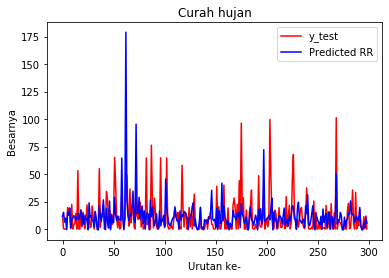

In [68]:
# Visualising the results
plt.plot(real_data[:,38], color = 'red', label = 'y_test')
plt.plot(percobaan2, color = 'blue', label = 'Predicted RR')
plt.title('Curah hujan')
plt.xlabel('Urutan ke-')
plt.ylabel('Besarnya')
plt.legend()
plt.show()

In [69]:
mse2 = mean_squared_error(real_data[:,38],percobaan2)
mse2

305.2845908953139

PERCOBAAN 3

In [70]:
pelatihan3 = regressor.fit(X_train, y_train, validation_split = 0.10, epochs = 200, batch_size = 32)

Train on 2420 samples, validate on 269 samples
Epoch 1/200
2420/2420 [==============================] - 2s 677us/step - loss: 0.0043 - acc: 0.2355 - val_loss: 0.0150 - val_acc: 0.2230
Epoch 2/200
2420/2420 [==============================] - 2s 656us/step - loss: 0.0044 - acc: 0.2355 - val_loss: 0.0156 - val_acc: 0.2230
Epoch 3/200
2420/2420 [==============================] - 2s 644us/step - loss: 0.0042 - acc: 0.2355 - val_loss: 0.0163 - val_acc: 0.2230
Epoch 4/200
2420/2420 [==============================] - 2s 654us/step - loss: 0.0043 - acc: 0.2355 - val_loss: 0.0169 - val_acc: 0.2230
Epoch 5/200
2420/2420 [==============================] - 2s 658us/step - loss: 0.0044 - acc: 0.2355 - val_loss: 0.0154 - val_acc: 0.2230
Epoch 6/200
2420/2420 [==============================] - 2s 638us/step - loss: 0.0043 - acc: 0.2355 - val_loss: 0.0165 - val_acc: 0.2230
Epoch 7/200
2420/2420 [==============================] - 2s 681us/step - loss: 0.0041 - acc: 0.2355 - val_loss: 0.0157 - val_acc: 0

Epoch 60/200
2420/2420 [==============================] - 2s 635us/step - loss: 0.0040 - acc: 0.2355 - val_loss: 0.0155 - val_acc: 0.2230
Epoch 61/200
2420/2420 [==============================] - 2s 627us/step - loss: 0.0041 - acc: 0.2355 - val_loss: 0.0152 - val_acc: 0.2230
Epoch 62/200
2420/2420 [==============================] - 2s 627us/step - loss: 0.0041 - acc: 0.2355 - val_loss: 0.0148 - val_acc: 0.2230
Epoch 63/200
2420/2420 [==============================] - 2s 631us/step - loss: 0.0040 - acc: 0.2355 - val_loss: 0.0158 - val_acc: 0.2230
Epoch 64/200
2420/2420 [==============================] - 2s 630us/step - loss: 0.0041 - acc: 0.2355 - val_loss: 0.0162 - val_acc: 0.2230
Epoch 65/200
2420/2420 [==============================] - 2s 631us/step - loss: 0.0042 - acc: 0.2355 - val_loss: 0.0160 - val_acc: 0.2230
Epoch 66/200
2420/2420 [==============================] - 2s 628us/step - loss: 0.0039 - acc: 0.2355 - val_loss: 0.0158 - val_acc: 0.2230
Epoch 67/200
2420/2420 [==========

Epoch 119/200
2420/2420 [==============================] - 2s 636us/step - loss: 0.0041 - acc: 0.2355 - val_loss: 0.0167 - val_acc: 0.2230
Epoch 120/200
2420/2420 [==============================] - 2s 644us/step - loss: 0.0037 - acc: 0.2355 - val_loss: 0.0171 - val_acc: 0.2230
Epoch 121/200
2420/2420 [==============================] - 2s 629us/step - loss: 0.0037 - acc: 0.2355 - val_loss: 0.0161 - val_acc: 0.2230
Epoch 122/200
2420/2420 [==============================] - 2s 646us/step - loss: 0.0038 - acc: 0.2355 - val_loss: 0.0148 - val_acc: 0.2230
Epoch 123/200
2420/2420 [==============================] - 2s 638us/step - loss: 0.0038 - acc: 0.2355 - val_loss: 0.0154 - val_acc: 0.2230
Epoch 124/200
2420/2420 [==============================] - 2s 645us/step - loss: 0.0037 - acc: 0.2355 - val_loss: 0.0162 - val_acc: 0.2230
Epoch 125/200
2420/2420 [==============================] - 2s 654us/step - loss: 0.0035 - acc: 0.2355 - val_loss: 0.0164 - val_acc: 0.2230
Epoch 126/200
2420/2420 [==

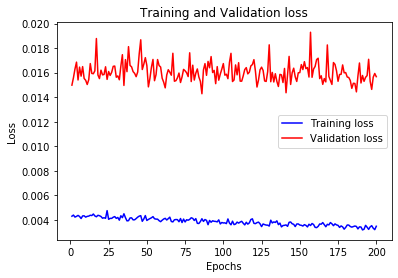

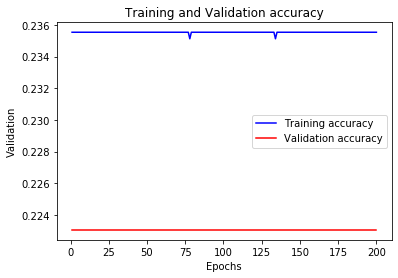

In [71]:
plot_history(pelatihan3)

In [72]:
loss_mean3 = stats.mean(pelatihan3.history['loss'])
loss_mean3

0.003854086902687203

In [73]:
acc_mean3 = stats.mean(pelatihan3.history['acc'])
acc_mean3

0.2355330578793179

In [74]:
valloss_mean3 = stats.mean(pelatihan3.history['val_loss'])
valloss_mean3

0.016021785179698808

In [75]:
val_acc_mean3 = stats.mean(pelatihan3.history['val_acc'])
val_acc_mean3

0.223048327691493

In [76]:
predicted_RR3 = regressor.predict(X_test)

In [77]:
predicted_RR3.shape

(299, 1)

In [78]:
predicted_RReal3 = np.hstack((X_testReal,predicted_RR3))

In [79]:
predicted_RReal_c = sc.inverse_transform(predicted_RReal3)

In [80]:
percobaan3 = predicted_RReal_c[:,38] 

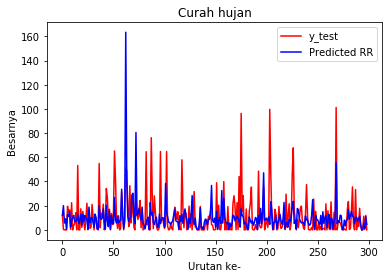

In [81]:
# Visualising the results
plt.plot(real_data[:,38], color = 'red', label = 'y_test')
plt.plot(percobaan3, color = 'blue', label = 'Predicted RR')
plt.title('Curah hujan')
plt.xlabel('Urutan ke-')
plt.ylabel('Besarnya')
plt.legend()
plt.show()

In [82]:
mse3 = mean_squared_error(real_data[:,38],percobaan3)
mse3

278.3881682297485

PERCOBAAN 4

In [83]:
pelatihan4 = regressor.fit(X_train, y_train, validation_split = 0.10, epochs = 200, batch_size = 32)

Train on 2420 samples, validate on 269 samples
Epoch 1/200
2420/2420 [==============================] - 2s 668us/step - loss: 0.0033 - acc: 0.2355 - val_loss: 0.0162 - val_acc: 0.2230
Epoch 2/200
2420/2420 [==============================] - 2s 661us/step - loss: 0.0033 - acc: 0.2355 - val_loss: 0.0163 - val_acc: 0.2230
Epoch 3/200
2420/2420 [==============================] - 2s 643us/step - loss: 0.0035 - acc: 0.2355 - val_loss: 0.0165 - val_acc: 0.2230
Epoch 4/200
2420/2420 [==============================] - 2s 644us/step - loss: 0.0037 - acc: 0.2355 - val_loss: 0.0159 - val_acc: 0.2230
Epoch 5/200
2420/2420 [==============================] - 2s 647us/step - loss: 0.0034 - acc: 0.2355 - val_loss: 0.0154 - val_acc: 0.2230
Epoch 6/200
2420/2420 [==============================] - 2s 663us/step - loss: 0.0033 - acc: 0.2355 - val_loss: 0.0167 - val_acc: 0.2230
Epoch 7/200
2420/2420 [==============================] - 2s 658us/step - loss: 0.0034 - acc: 0.2355 - val_loss: 0.0166 - val_acc: 0

2420/2420 [==============================] - 2s 642us/step - loss: 0.0034 - acc: 0.2355 - val_loss: 0.0160 - val_acc: 0.2230
Epoch 61/200
2420/2420 [==============================] - 2s 643us/step - loss: 0.0032 - acc: 0.2355 - val_loss: 0.0150 - val_acc: 0.2230
Epoch 62/200
2420/2420 [==============================] - 2s 631us/step - loss: 0.0031 - acc: 0.2355 - val_loss: 0.0151 - val_acc: 0.2230
Epoch 63/200
2420/2420 [==============================] - 2s 648us/step - loss: 0.0031 - acc: 0.2355 - val_loss: 0.0151 - val_acc: 0.2230
Epoch 64/200
2420/2420 [==============================] - 2s 638us/step - loss: 0.0031 - acc: 0.2355 - val_loss: 0.0149 - val_acc: 0.2230
Epoch 65/200
2420/2420 [==============================] - 2s 643us/step - loss: 0.0031 - acc: 0.2355 - val_loss: 0.0154 - val_acc: 0.2230
Epoch 66/200
2420/2420 [==============================] - 2s 648us/step - loss: 0.0031 - acc: 0.2355 - val_loss: 0.0155 - val_acc: 0.2230
Epoch 67/200
2420/2420 [=======================

2420/2420 [==============================] - 2s 664us/step - loss: 0.0028 - acc: 0.2355 - val_loss: 0.0149 - val_acc: 0.2230
Epoch 179/200
2420/2420 [==============================] - 2s 663us/step - loss: 0.0029 - acc: 0.2355 - val_loss: 0.0148 - val_acc: 0.2230
Epoch 180/200
2420/2420 [==============================] - 2s 669us/step - loss: 0.0029 - acc: 0.2355 - val_loss: 0.0148 - val_acc: 0.2230
Epoch 181/200
2420/2420 [==============================] - 2s 654us/step - loss: 0.0029 - acc: 0.2355 - val_loss: 0.0170 - val_acc: 0.2193
Epoch 182/200
2420/2420 [==============================] - 2s 646us/step - loss: 0.0028 - acc: 0.2355 - val_loss: 0.0152 - val_acc: 0.2230
Epoch 183/200
2420/2420 [==============================] - 2s 638us/step - loss: 0.0027 - acc: 0.2355 - val_loss: 0.0160 - val_acc: 0.2230
Epoch 184/200
2420/2420 [==============================] - 2s 647us/step - loss: 0.0029 - acc: 0.2355 - val_loss: 0.0143 - val_acc: 0.2230
Epoch 185/200
2420/2420 [================

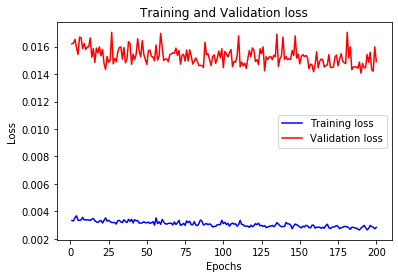

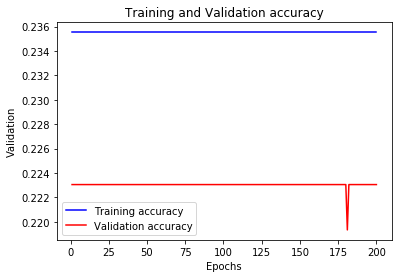

In [84]:
plot_history(pelatihan4)

In [85]:
loss_mean4 = stats.mean(pelatihan4.history['loss'])
loss_mean4

0.0030758188738403956

In [86]:
acc_mean4 = stats.mean(pelatihan4.history['acc'])
acc_mean4

0.23553719010742857

In [87]:
valloss_mean4 = stats.mean(pelatihan4.history['val_loss'])
valloss_mean4

0.015278158911121283

In [88]:
val_acc_mean4 = stats.mean(pelatihan4.history['val_acc'])
val_acc_mean4

0.2230297403308982

In [89]:
predicted_RR4 = regressor.predict(X_test)

In [90]:
predicted_RR4.shape

(299, 1)

In [91]:
predicted_RReal4 = np.hstack((X_testReal,predicted_RR4))

In [92]:
predicted_RReal_d = sc.inverse_transform(predicted_RReal4)

In [93]:
percobaan4 = predicted_RReal_d[:,38] 

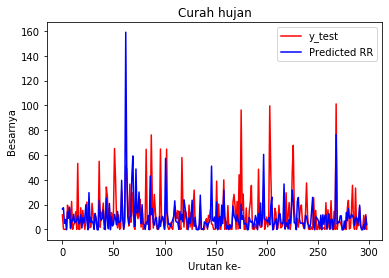

In [94]:
# Visualising the results
plt.plot(real_data[:,38], color = 'red', label = 'y_test')
plt.plot(percobaan4, color = 'blue', label = 'Predicted RR')
plt.title('Curah hujan')
plt.xlabel('Urutan ke-')
plt.ylabel('Besarnya')
plt.legend()
plt.show()

In [95]:
mse4 = mean_squared_error(real_data[:,38],percobaan4)
mse4

292.0444609854014

PERCOBAAN 5

In [96]:
pelatihan5 = regressor.fit(X_train, y_train, validation_split = 0.10, epochs = 200, batch_size = 32)

Train on 2420 samples, validate on 269 samples
Epoch 1/200
2420/2420 [==============================] - 2s 636us/step - loss: 0.0027 - acc: 0.2355 - val_loss: 0.0156 - val_acc: 0.2230
Epoch 2/200
2420/2420 [==============================] - 2s 631us/step - loss: 0.0028 - acc: 0.2355 - val_loss: 0.0147 - val_acc: 0.2230
Epoch 3/200
2420/2420 [==============================] - 2s 636us/step - loss: 0.0027 - acc: 0.2355 - val_loss: 0.0144 - val_acc: 0.2230
Epoch 4/200
2420/2420 [==============================] - 2s 662us/step - loss: 0.0027 - acc: 0.2355 - val_loss: 0.0143 - val_acc: 0.2230
Epoch 5/200
2420/2420 [==============================] - 2s 640us/step - loss: 0.0027 - acc: 0.2355 - val_loss: 0.0160 - val_acc: 0.2230
Epoch 6/200
2420/2420 [==============================] - 2s 652us/step - loss: 0.0028 - acc: 0.2355 - val_loss: 0.0153 - val_acc: 0.2230
Epoch 7/200
2420/2420 [==============================] - 2s 644us/step - loss: 0.0028 - acc: 0.2355 - val_loss: 0.0147 - val_acc: 0

2420/2420 [==============================] - 2s 668us/step - loss: 0.0028 - acc: 0.2355 - val_loss: 0.0152 - val_acc: 0.2230
Epoch 61/200
2420/2420 [==============================] - 2s 643us/step - loss: 0.0026 - acc: 0.2355 - val_loss: 0.0152 - val_acc: 0.2230
Epoch 62/200
2420/2420 [==============================] - 2s 650us/step - loss: 0.0027 - acc: 0.2355 - val_loss: 0.0151 - val_acc: 0.2230
Epoch 63/200
2420/2420 [==============================] - 2s 669us/step - loss: 0.0026 - acc: 0.2355 - val_loss: 0.0152 - val_acc: 0.2230
Epoch 64/200
2420/2420 [==============================] - 2s 657us/step - loss: 0.0025 - acc: 0.2355 - val_loss: 0.0149 - val_acc: 0.2230
Epoch 65/200
2420/2420 [==============================] - 2s 655us/step - loss: 0.0024 - acc: 0.2355 - val_loss: 0.0153 - val_acc: 0.2230
Epoch 66/200
2420/2420 [==============================] - 2s 645us/step - loss: 0.0026 - acc: 0.2355 - val_loss: 0.0147 - val_acc: 0.2230
Epoch 67/200
2420/2420 [=======================

Epoch 178/200
2420/2420 [==============================] - 2s 647us/step - loss: 0.0024 - acc: 0.2355 - val_loss: 0.0152 - val_acc: 0.2230
Epoch 179/200
2420/2420 [==============================] - 2s 641us/step - loss: 0.0025 - acc: 0.2355 - val_loss: 0.0157 - val_acc: 0.2230
Epoch 180/200
2420/2420 [==============================] - 2s 645us/step - loss: 0.0027 - acc: 0.2355 - val_loss: 0.0147 - val_acc: 0.2230
Epoch 181/200
2420/2420 [==============================] - 2s 640us/step - loss: 0.0025 - acc: 0.2355 - val_loss: 0.0148 - val_acc: 0.2230
Epoch 182/200
2420/2420 [==============================] - 2s 644us/step - loss: 0.0024 - acc: 0.2355 - val_loss: 0.0153 - val_acc: 0.2230
Epoch 183/200
2420/2420 [==============================] - 2s 645us/step - loss: 0.0024 - acc: 0.2355 - val_loss: 0.0144 - val_acc: 0.2230
Epoch 184/200
2420/2420 [==============================] - 2s 644us/step - loss: 0.0024 - acc: 0.2355 - val_loss: 0.0151 - val_acc: 0.2230
Epoch 185/200
2420/2420 [==

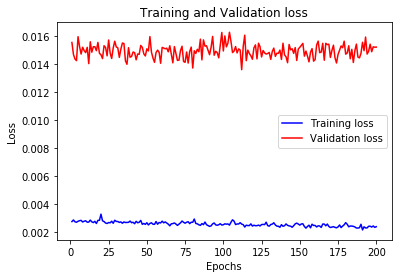

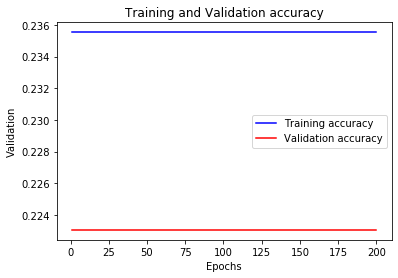

In [97]:
plot_history(pelatihan5)

In [98]:
loss_mean5 = stats.mean(pelatihan5.history['loss'])
loss_mean5

0.0025461349358446876

In [99]:
acc_mean5 = stats.mean(pelatihan5.history['acc'])
acc_mean5

0.2355371901044114

In [100]:
valloss_mean5 = stats.mean(pelatihan5.history['val_loss'])
valloss_mean5

0.014949646395638491

In [101]:
val_acc_mean5 = stats.mean(pelatihan5.history['val_acc'])
val_acc_mean5

0.223048327691493

In [102]:
predicted_RR5 = regressor.predict(X_test)

In [103]:
predicted_RR5.shape

(299, 1)

In [104]:
predicted_RReal5 = np.hstack((X_testReal,predicted_RR5))

In [105]:
predicted_RReal_e = sc.inverse_transform(predicted_RReal5)

In [106]:
percobaan5 = predicted_RReal_e[:,38] 

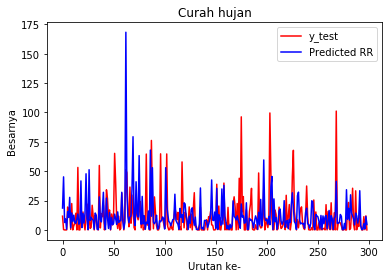

In [107]:
# Visualising the results
plt.plot(real_data[:,38], color = 'red', label = 'y_test')
plt.plot(percobaan5, color = 'blue', label = 'Predicted RR')
plt.title('Curah hujan')
plt.xlabel('Urutan ke-')
plt.ylabel('Besarnya')
plt.legend()
plt.show()

In [108]:
mse5 = mean_squared_error(real_data[:,38],percobaan5)
mse5

346.6995246764376

In [113]:
meanRR1 = stats.mean(percobaan1)
meanRR1

13.259928290380234

In [114]:
meanRR2 = stats.mean(percobaan2)
meanRR2

11.540802717682311

In [115]:
meanRR3 = stats.mean(percobaan3)
meanRR3

10.009870415167217

In [116]:
meanRR4 = stats.mean(percobaan4)
meanRR4

9.888105512095185

In [117]:
meanRR5 = stats.mean(percobaan5)
meanRR5

12.346727319971276

# PENGATURAN PARAMETER

In [143]:
pelatihan6 = regressor.fit(X_train, y_train, validation_split = 0.10, epochs = 400, batch_size = 64)

Train on 2420 samples, validate on 269 samples
Epoch 1/400
2420/2420 [==============================] - 1s 324us/step - loss: 0.0016 - acc: 0.2355 - val_loss: 0.0163 - val_acc: 0.2230
Epoch 2/400
2420/2420 [==============================] - 1s 329us/step - loss: 0.0016 - acc: 0.2355 - val_loss: 0.0152 - val_acc: 0.2230
Epoch 3/400
2420/2420 [==============================] - 1s 325us/step - loss: 0.0015 - acc: 0.2355 - val_loss: 0.0162 - val_acc: 0.2230
Epoch 4/400
2420/2420 [==============================] - 1s 325us/step - loss: 0.0016 - acc: 0.2355 - val_loss: 0.0162 - val_acc: 0.2230
Epoch 5/400
2420/2420 [==============================] - 1s 317us/step - loss: 0.0015 - acc: 0.2355 - val_loss: 0.0159 - val_acc: 0.2230
Epoch 6/400
2420/2420 [==============================] - 1s 341us/step - loss: 0.0016 - acc: 0.2355 - val_loss: 0.0158 - val_acc: 0.2230
Epoch 7/400
2420/2420 [==============================] - 1s 325us/step - loss: 0.0015 - acc: 0.2355 - val_loss: 0.0155 - val_acc: 0

2420/2420 [==============================] - 1s 319us/step - loss: 0.0014 - acc: 0.2355 - val_loss: 0.0164 - val_acc: 0.2230
Epoch 61/400
2420/2420 [==============================] - 1s 319us/step - loss: 0.0014 - acc: 0.2355 - val_loss: 0.0163 - val_acc: 0.2230
Epoch 62/400
2420/2420 [==============================] - 1s 322us/step - loss: 0.0014 - acc: 0.2355 - val_loss: 0.0166 - val_acc: 0.2230
Epoch 63/400
2420/2420 [==============================] - 1s 320us/step - loss: 0.0015 - acc: 0.2355 - val_loss: 0.0166 - val_acc: 0.2230
Epoch 64/400
2420/2420 [==============================] - 1s 322us/step - loss: 0.0015 - acc: 0.2355 - val_loss: 0.0167 - val_acc: 0.2230
Epoch 65/400
2420/2420 [==============================] - 1s 317us/step - loss: 0.0014 - acc: 0.2355 - val_loss: 0.0170 - val_acc: 0.2230
Epoch 66/400
2420/2420 [==============================] - 1s 325us/step - loss: 0.0015 - acc: 0.2355 - val_loss: 0.0163 - val_acc: 0.2230
Epoch 67/400
2420/2420 [=======================

2420/2420 [==============================] - 1s 328us/step - loss: 0.0015 - acc: 0.2355 - val_loss: 0.0169 - val_acc: 0.2230
Epoch 179/400
2420/2420 [==============================] - 1s 331us/step - loss: 0.0013 - acc: 0.2355 - val_loss: 0.0177 - val_acc: 0.2230
Epoch 180/400
2420/2420 [==============================] - 1s 333us/step - loss: 0.0014 - acc: 0.2355 - val_loss: 0.0174 - val_acc: 0.2230
Epoch 181/400
2420/2420 [==============================] - 1s 327us/step - loss: 0.0013 - acc: 0.2355 - val_loss: 0.0176 - val_acc: 0.2230
Epoch 182/400
2420/2420 [==============================] - 1s 324us/step - loss: 0.0014 - acc: 0.2355 - val_loss: 0.0180 - val_acc: 0.2230
Epoch 183/400
2420/2420 [==============================] - 1s 326us/step - loss: 0.0014 - acc: 0.2355 - val_loss: 0.0169 - val_acc: 0.2230
Epoch 184/400
2420/2420 [==============================] - 1s 327us/step - loss: 0.0014 - acc: 0.2355 - val_loss: 0.0173 - val_acc: 0.2230
Epoch 185/400
2420/2420 [================

2420/2420 [==============================] - 1s 321us/step - loss: 0.0015 - acc: 0.2355 - val_loss: 0.0167 - val_acc: 0.2230
Epoch 238/400
2420/2420 [==============================] - 1s 320us/step - loss: 0.0015 - acc: 0.2355 - val_loss: 0.0164 - val_acc: 0.2230
Epoch 239/400
2420/2420 [==============================] - 1s 322us/step - loss: 0.0013 - acc: 0.2355 - val_loss: 0.0165 - val_acc: 0.2230
Epoch 240/400
2420/2420 [==============================] - 1s 322us/step - loss: 0.0013 - acc: 0.2355 - val_loss: 0.0168 - val_acc: 0.2230
Epoch 241/400
2420/2420 [==============================] - 1s 317us/step - loss: 0.0014 - acc: 0.2355 - val_loss: 0.0164 - val_acc: 0.2230
Epoch 242/400
2420/2420 [==============================] - 1s 324us/step - loss: 0.0014 - acc: 0.2355 - val_loss: 0.0165 - val_acc: 0.2230
Epoch 243/400
2420/2420 [==============================] - 1s 320us/step - loss: 0.0014 - acc: 0.2355 - val_loss: 0.0160 - val_acc: 0.2230
Epoch 244/400
2420/2420 [================

2420/2420 [==============================] - 1s 329us/step - loss: 0.0014 - acc: 0.2355 - val_loss: 0.0164 - val_acc: 0.2230
Epoch 297/400
2420/2420 [==============================] - 1s 325us/step - loss: 0.0013 - acc: 0.2355 - val_loss: 0.0162 - val_acc: 0.2230
Epoch 298/400
2420/2420 [==============================] - 1s 319us/step - loss: 0.0013 - acc: 0.2355 - val_loss: 0.0162 - val_acc: 0.2230
Epoch 299/400
2420/2420 [==============================] - 1s 325us/step - loss: 0.0014 - acc: 0.2355 - val_loss: 0.0166 - val_acc: 0.2230
Epoch 300/400
2420/2420 [==============================] - 1s 332us/step - loss: 0.0013 - acc: 0.2355 - val_loss: 0.0166 - val_acc: 0.2230
Epoch 301/400
2420/2420 [==============================] - 1s 329us/step - loss: 0.0013 - acc: 0.2355 - val_loss: 0.0163 - val_acc: 0.2230
Epoch 302/400
2420/2420 [==============================] - 1s 353us/step - loss: 0.0013 - acc: 0.2355 - val_loss: 0.0170 - val_acc: 0.2230
Epoch 303/400
2420/2420 [================

2420/2420 [==============================] - 1s 321us/step - loss: 0.0013 - acc: 0.2355 - val_loss: 0.0168 - val_acc: 0.2230
Epoch 356/400
2420/2420 [==============================] - 1s 322us/step - loss: 0.0015 - acc: 0.2355 - val_loss: 0.0166 - val_acc: 0.2230
Epoch 357/400
2420/2420 [==============================] - 1s 322us/step - loss: 0.0014 - acc: 0.2355 - val_loss: 0.0170 - val_acc: 0.2230
Epoch 358/400
2420/2420 [==============================] - 1s 319us/step - loss: 0.0015 - acc: 0.2355 - val_loss: 0.0171 - val_acc: 0.2230
Epoch 359/400
2420/2420 [==============================] - 1s 320us/step - loss: 0.0012 - acc: 0.2355 - val_loss: 0.0172 - val_acc: 0.2230
Epoch 360/400
2420/2420 [==============================] - 1s 323us/step - loss: 0.0013 - acc: 0.2355 - val_loss: 0.0181 - val_acc: 0.2230
Epoch 361/400
2420/2420 [==============================] - 1s 314us/step - loss: 0.0013 - acc: 0.2355 - val_loss: 0.0168 - val_acc: 0.2230
Epoch 362/400
2420/2420 [================

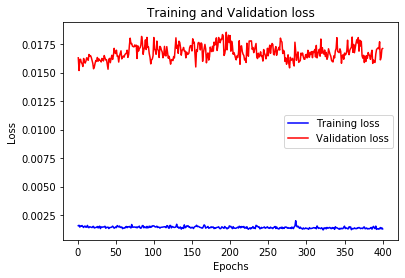

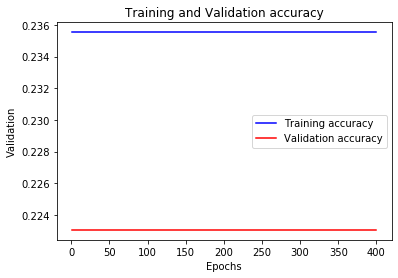

In [144]:
plot_history(pelatihan6)

In [145]:
loss_mean6 = stats.mean(pelatihan6.history['loss'])
loss_mean6

0.001416375056750883

In [146]:
acc_mean6 = stats.mean(pelatihan6.history['acc'])
acc_mean6

0.23553719015985974

In [147]:
valloss_mean6 = stats.mean(pelatihan6.history['val_loss'])
valloss_mean6

0.016760588332363248

In [148]:
val_acc_mean6 = stats.mean(pelatihan6.history['val_acc'])
val_acc_mean6

0.223048327691493

In [149]:
predicted_RR6 = regressor.predict(X_test)

In [150]:
predicted_RR6.shape

(299, 1)

In [151]:
predicted_RReal6 = np.hstack((X_testReal,predicted_RR6))

In [152]:
predicted_RReal_f = sc.inverse_transform(predicted_RReal6)

In [153]:
percobaan6 = predicted_RReal_f[:,38] 

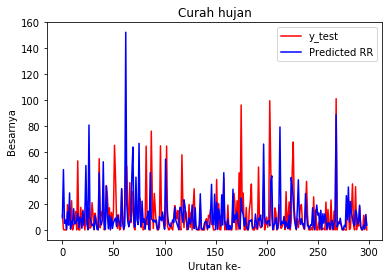

In [154]:
# Visualising the results
plt.plot(real_data[:,38], color = 'red', label = 'y_test')
plt.plot(percobaan6, color = 'blue', label = 'Predicted RR')
plt.title('Curah hujan')
plt.xlabel('Urutan ke-')
plt.ylabel('Besarnya')
plt.legend()
plt.show()

In [155]:
mse6 = mean_squared_error(real_data[:,38],percobaan6)
mse6

341.26180963302136

In [169]:
pd.DataFrame(percobaan1).to_csv("percobaan1.csv",header=None,index ='RR')
pd.DataFrame(percobaan2).to_csv("percobaan2.csv",header=None)
pd.DataFrame(percobaan3).to_csv("percobaan3.csv",header=None)
pd.DataFrame(percobaan4).to_csv("percobaan4.csv",header=None)
pd.DataFrame(percobaan5).to_csv("percobaan5.csv",header=None)
pd.DataFrame(percobaan6).to_csv("percobaan6.csv",header=None)

# TEST PREDIKSI MODEL

In [170]:
test_prototype = pd.read_csv('CSV\Data Test Prediksi Prototype 1a .csv')
test_prototype.head()

,Tanggal,Tn,Tx,Tavg,ddd_x,ff_avg,N,NE,E,SE,S,SW,W,NW,C,Jan,Feb,Mar,Apr,Mei,Jun,Jul,Ags,Sep,Okt,Nov,Des,RH_avg_5day,RH1,RH2,RH3,RH_avg,ff_x,ff_x1,ff_x2,ff_x3,RR_avg5_day,RR1,RR2,RR3,RR
0,01-01-2019,25.000000,32.3,27.8,240.0,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,79.8,79.0,78.0,78.0,77.0,6.0,5.0,6.0,12.0,11.806,0.500,20.665,20.665,4.0
1,02-01-2019,25.036364,31.6,28.1,240.0,2.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,78.8,78.0,78.0,77.0,78.0,5.0,6.0,12.0,6.0,10.246,20.665,20.665,4.000,0.4
2,03-01-2019,24.600000,30.4,26.9,230.0,2.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,78.0,78.0,77.0,78.0,86.0,8.0,12.0,6.0,5.0,9.246,20.665,4.000,0.400,39.7
3,04-01-2019,25.036364,31.8,28.4,200.0,1.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,79.4,77.0,78.0,86.0,76.0,4.0,6.0,5.0,8.0,17.086,4.000,0.400,39.700,16.8
4,05-01-2019,25.000000,31.0,27.7,180.0,1.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,79.0,78.0,86.0,76.0,83.0,4.0,5.0,8.0,4.0,16.313,0.400,39.700,16.800,0.3


In [171]:
test_prototype.fillna(method='ffill',inplace=True)

In [172]:
test_prototype = test_prototype.drop(columns = ['ff_avg','Tanggal'])

In [173]:
prototype_scaled = sc.fit_transform(test_prototype)

In [174]:
X2 = np.delete(prototype_scaled,38,axis=1)
y2 = prototype_scaled[:,38]

In [175]:
X_proTest = np.reshape(X2,(X2.shape[0],1,X2.shape[1])) 

In [176]:
predicted_RRTest = regressor.predict(X_proTest)

In [177]:
predicted_RRTest.shape

(148, 1)

In [179]:
predicted_RRealTest = np.hstack((X2,predicted_RRTest))

In [180]:
predicted_RReal_Pred = sc.inverse_transform(predicted_RRealTest)

In [181]:
percobaanTest = predicted_RReal_Pred[:,38] 

In [183]:
pd.DataFrame(percobaanTest).to_csv("percobaanTest.csv",header=None,index ='RR')

In [184]:
stats.mean(percobaanTest)

3.0828774098055183

In [185]:
pelatihan.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])